# Modelling

In [2]:
import pandas as pd

file_path = "../data/dataset/OR_AE2_Project_Adjusted.xlsx"
df_original = pd.read_excel(file_path, engine='openpyxl')

### Data Expansion

In [3]:
df = df_original.loc[df_original.index.repeat(df_original['Number_Of_Attendances'])].reset_index(drop=True)
df = df.drop(columns=['Number_Of_Attendances'])
print(f"Original dataset dimensions: {df_original.shape}")
print(f"Extended dataset dimensions: {df.shape}")

Original dataset dimensions: (364346, 19)
Extended dataset dimensions: (1811942, 18)


### Data Transformation: Mapping Ranges

In [4]:
import numpy as np

y = df['Wait_Time']

# Define the range mappings
range_mapping = {
    '00-29': (0, 29),
    '30-59': (30, 59),
    '60-89': (60, 89),
    '90-119': (90, 119),
    '120-149': (120, 149),
    '150-179': (150, 179),
    '180-209': (180, 209),
    '210-239': (210, 239),
    '240-269': (240, 269),
    '270-299': (270, 299),
    '300-329': (300, 329),
    '360+': (360, 420)  
}

distance_mapping = {
    '00 to 05': (0, 5),
    '05 to 10': (5, 10),
    '10 to 15': (10, 15),
    '15 to 20': (15, 20),
    '20 to 25': (20, 25),
    '25 to 30': (25, 30),
    '30 to 35': (30, 35),
    '35 to 40': (35, 40),
    '40 to 45': (40, 45),
    '45 to 50': (45, 50),
    '50 to 55': (50, 55)
}

time_mapping = {
    '00 to 05': (0, 5),
    '05 to 10': (5, 10),
    '10 to 15': (10, 15),
    '15 to 20': (15, 20),
    '20 to 25': (20, 25),
    '25 to 30': (25, 30),
    '30 to 35': (30, 35),
    '35 to 40': (35, 40),
    '40 to 45': (40, 45),
    '45 to 50': (45, 50),
    '50 to 55': (50, 55),
    '55 to 60': (55, 60),
    '60 to 65': (60, 65),
    '65 to 70': (65, 70),
    '70 to 75': (70, 75),
    '75 to 80': (75, 80),
    '80 to 85': (80, 85),
    '85 to 90': (85, 90)
}

# Function to generate random values within the range
def random_uniform_from_range(value, mapping):
    if pd.isna(value) or value not in mapping:
        return np.nan
    low, high = mapping[value]
    return np.random.randint(low, high + 1) 

y = y.apply(lambda val: random_uniform_from_range(val, range_mapping))
df['Drive_Distance_Miles'] = df['Drive_Distance_Miles'].apply(lambda val: random_uniform_from_range(val, distance_mapping))
df['Driving_Time_mins'] = df['Driving_Time_mins'].apply(lambda val: random_uniform_from_range(val, time_mapping))

# Drop the original 'Wait_Time' from X and get dummies for categorical columns
X = df.drop(columns=['Wait_Time'])

X.head()

,Site_Code,Site_Type,Site_X,Site_Y,Site_Loc_GPs,Site_Loc_GP_List,Site_Pop_20miles,Pat_X,Pat_Y,Pat_Loc_GPs,Pat_Loc_GP_List,Drive_Distance_Miles,Driving_Time_mins,Attendance_Type,Age_Group,Year,Month
0,2,ED,39785,114688,50,210000,1814482,38971,114101,0,0,0,3,New - unplanned,20-39,1,2
1,2,ED,39785,114688,50,210000,1814482,38971,114101,0,0,5,2,New - unplanned,20-39,1,3
2,2,ED,39785,114688,50,210000,1814482,38971,114101,0,0,4,2,New - unplanned,20-39,1,3
3,2,ED,39785,114688,50,210000,1814482,38971,114101,0,0,0,3,New - unplanned,20-39,1,4
4,2,ED,39785,114688,50,210000,1814482,38971,114101,0,0,5,2,New - unplanned,20-39,1,4


### Handling Categorical Variables

In [5]:
# Here we convert any categorical columns into dummy variables 
X = pd.get_dummies(X, drop_first=True)
X.head()

,Site_Code,Site_X,Site_Y,Site_Loc_GPs,Site_Loc_GP_List,Site_Pop_20miles,Pat_X,Pat_Y,Pat_Loc_GPs,Pat_Loc_GP_List,...,Year,Month,Site_Type_MIU/OTHER,Attendance_Type_Recall,Attendance_Type_Return - planned,Attendance_Type_Return - unplanned,Age_Group_40-59,Age_Group_60-79,Age_Group_80+,Age_Group_Missing
0,2,39785,114688,50,210000,1814482,38971,114101,0,0,...,1,2,False,False,False,False,False,False,False,False
1,2,39785,114688,50,210000,1814482,38971,114101,0,0,...,1,3,False,False,False,False,False,False,False,False
2,2,39785,114688,50,210000,1814482,38971,114101,0,0,...,1,3,False,False,False,False,False,False,False,False
3,2,39785,114688,50,210000,1814482,38971,114101,0,0,...,1,4,False,False,False,False,False,False,False,False
4,2,39785,114688,50,210000,1814482,38971,114101,0,0,...,1,4,False,False,False,False,False,False,False,False


### Splitting the dataset

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

seed = 42
# We divide the set into training (80%) an test (20%) set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

### Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression

# We create the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Prediction on test set
y_pred = model.predict(X_test)

In [18]:
# We compute the RMSE and MAE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"RMSE (Linear Regression): {rmse:.4f}")
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE (Linear Regression): {mae:.2f}")

RMSE (Linear Regression): 93.3010
MAE (Linear Regression): 74.07


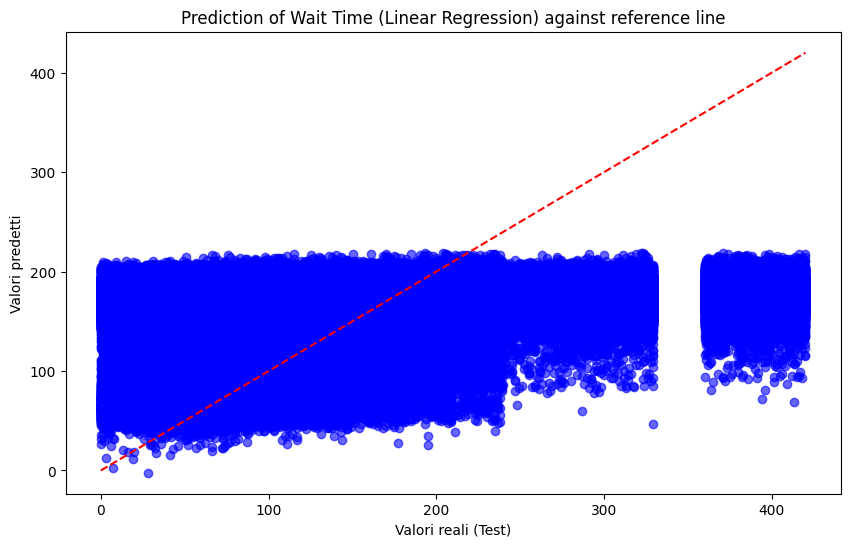

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Reference line
plt.title("Prediction of Wait Time (Linear Regression) against reference line")
plt.xlabel("Real values (Test)")
plt.ylabel("Predicted Values")
plt.show()

### Gradient Boosting Regressor

In [19]:
from sklearn.ensemble import GradientBoostingRegressor

# Let's assume 100 trees with a maximum depth of 3 (common parameters)
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=seed)

# Train the model on the training data
model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [20]:
# Prediction on test set
y_pred_GB = model.predict(X_test)

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_GB, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Reference line
plt.title("Prediction of Wait Time (Linear Regression) against reference line")
plt.xlabel("Real values (Test)")
plt.ylabel("Predicted Values")
plt.show()

In [ ]:
mae = mean_absolute_error(y_test, y_pred_GB)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_GB))

print(f"MAE (GradientBoostingRegressor): {mae:.2f}")
print(f"RMSE (GradientBoostingRegressor): {rmse:.2f}")

MAE (GradientBoostingRegressor): 73.21
RMSE (GradientBoostingRegressor): 92.38


### Neural Network

In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

# We convert data into torch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1) 
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

In [30]:
# Definition of the neural network for regression
class NeuralNetwork(nn.Module):
    def __init__(self, input_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)  # First fully connected layer (input -> 128 nodes)
        self.fc2 = nn.Linear(128, 64)  # Second fully connected layer (128 -> 64 nodes)
        self.fc3 = nn.Linear(64, 1)  # Final layer (64 -> 1 node, for continuous output)
        self.relu = nn.ReLU()  # ReLU activation function
    
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)  # No final activation, for regression
        return x

# Definition of the model, loss function, and optimizer
input_size = X_train.shape[1]  # Number of features
model = NeuralNetwork(input_size)
criterion = nn.MSELoss()  # Mean Squared Error for regression
optimizer = optim.Adam(model.parameters(), lr=0.0001)  # Adam optimizer

# Training of the neural network
num_epochs = 30  # Number of epochs
batch_size = 64  # Batch size

In [31]:
for epoch in range(num_epochs):
    model.train()
    for i in range(0, len(X_train_tensor), batch_size):
        X_batch = X_train_tensor[i:i+batch_size]
        y_batch = y_train_tensor[i:i+batch_size]
        
        # Forward pass
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        
        # Update the weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    if (epoch + 1) % 5 == 0:
        print(f"Epoca [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

Epoca [5/30], Loss: 6622.6890
Epoca [10/30], Loss: 6632.0664
Epoca [15/30], Loss: 6692.9648
Epoca [20/30], Loss: 6785.5552
Epoca [25/30], Loss: 6823.8784
Epoca [30/30], Loss: 6838.3369


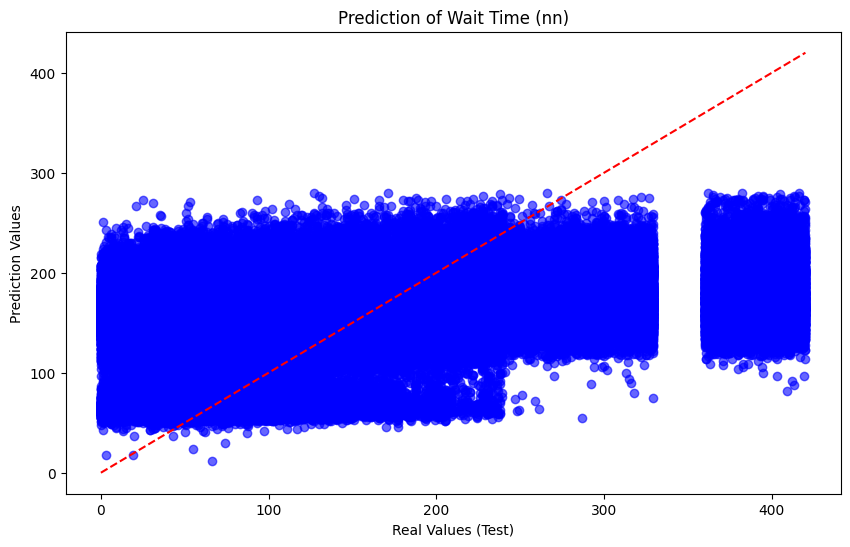

In [32]:
# Evaluation on test set
model.eval()
with torch.no_grad():
    y_pred_nn = model(X_test_tensor)
    y_pred_nn = y_pred_nn.numpy()

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_nn, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') # Reference line
plt.title("Prediction of Wait Time (nn)")
plt.xlabel("Real Values (Test)")
plt.ylabel("Prediction Values")
plt.show()

In [33]:
#Metrics

mse = mean_squared_error(y_test, y_pred_nn)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_nn)
print(f"MAE (NeuralNetwork): {mae:.2f}")
print(f"RMSE (NeuralNetwork): {rmse:.4f}")

MAE (NeuralNetwork): 72.21
RMSE (NeuralNetwork): 91.5678
